In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta
import matplotlib.pyplot as plt



In [44]:
df = pd.read_csv('data-traffic.csv')
df.Time = pd.to_datetime(df.Time)
df = df.sort_values(by='Time')

<AxesSubplot:>

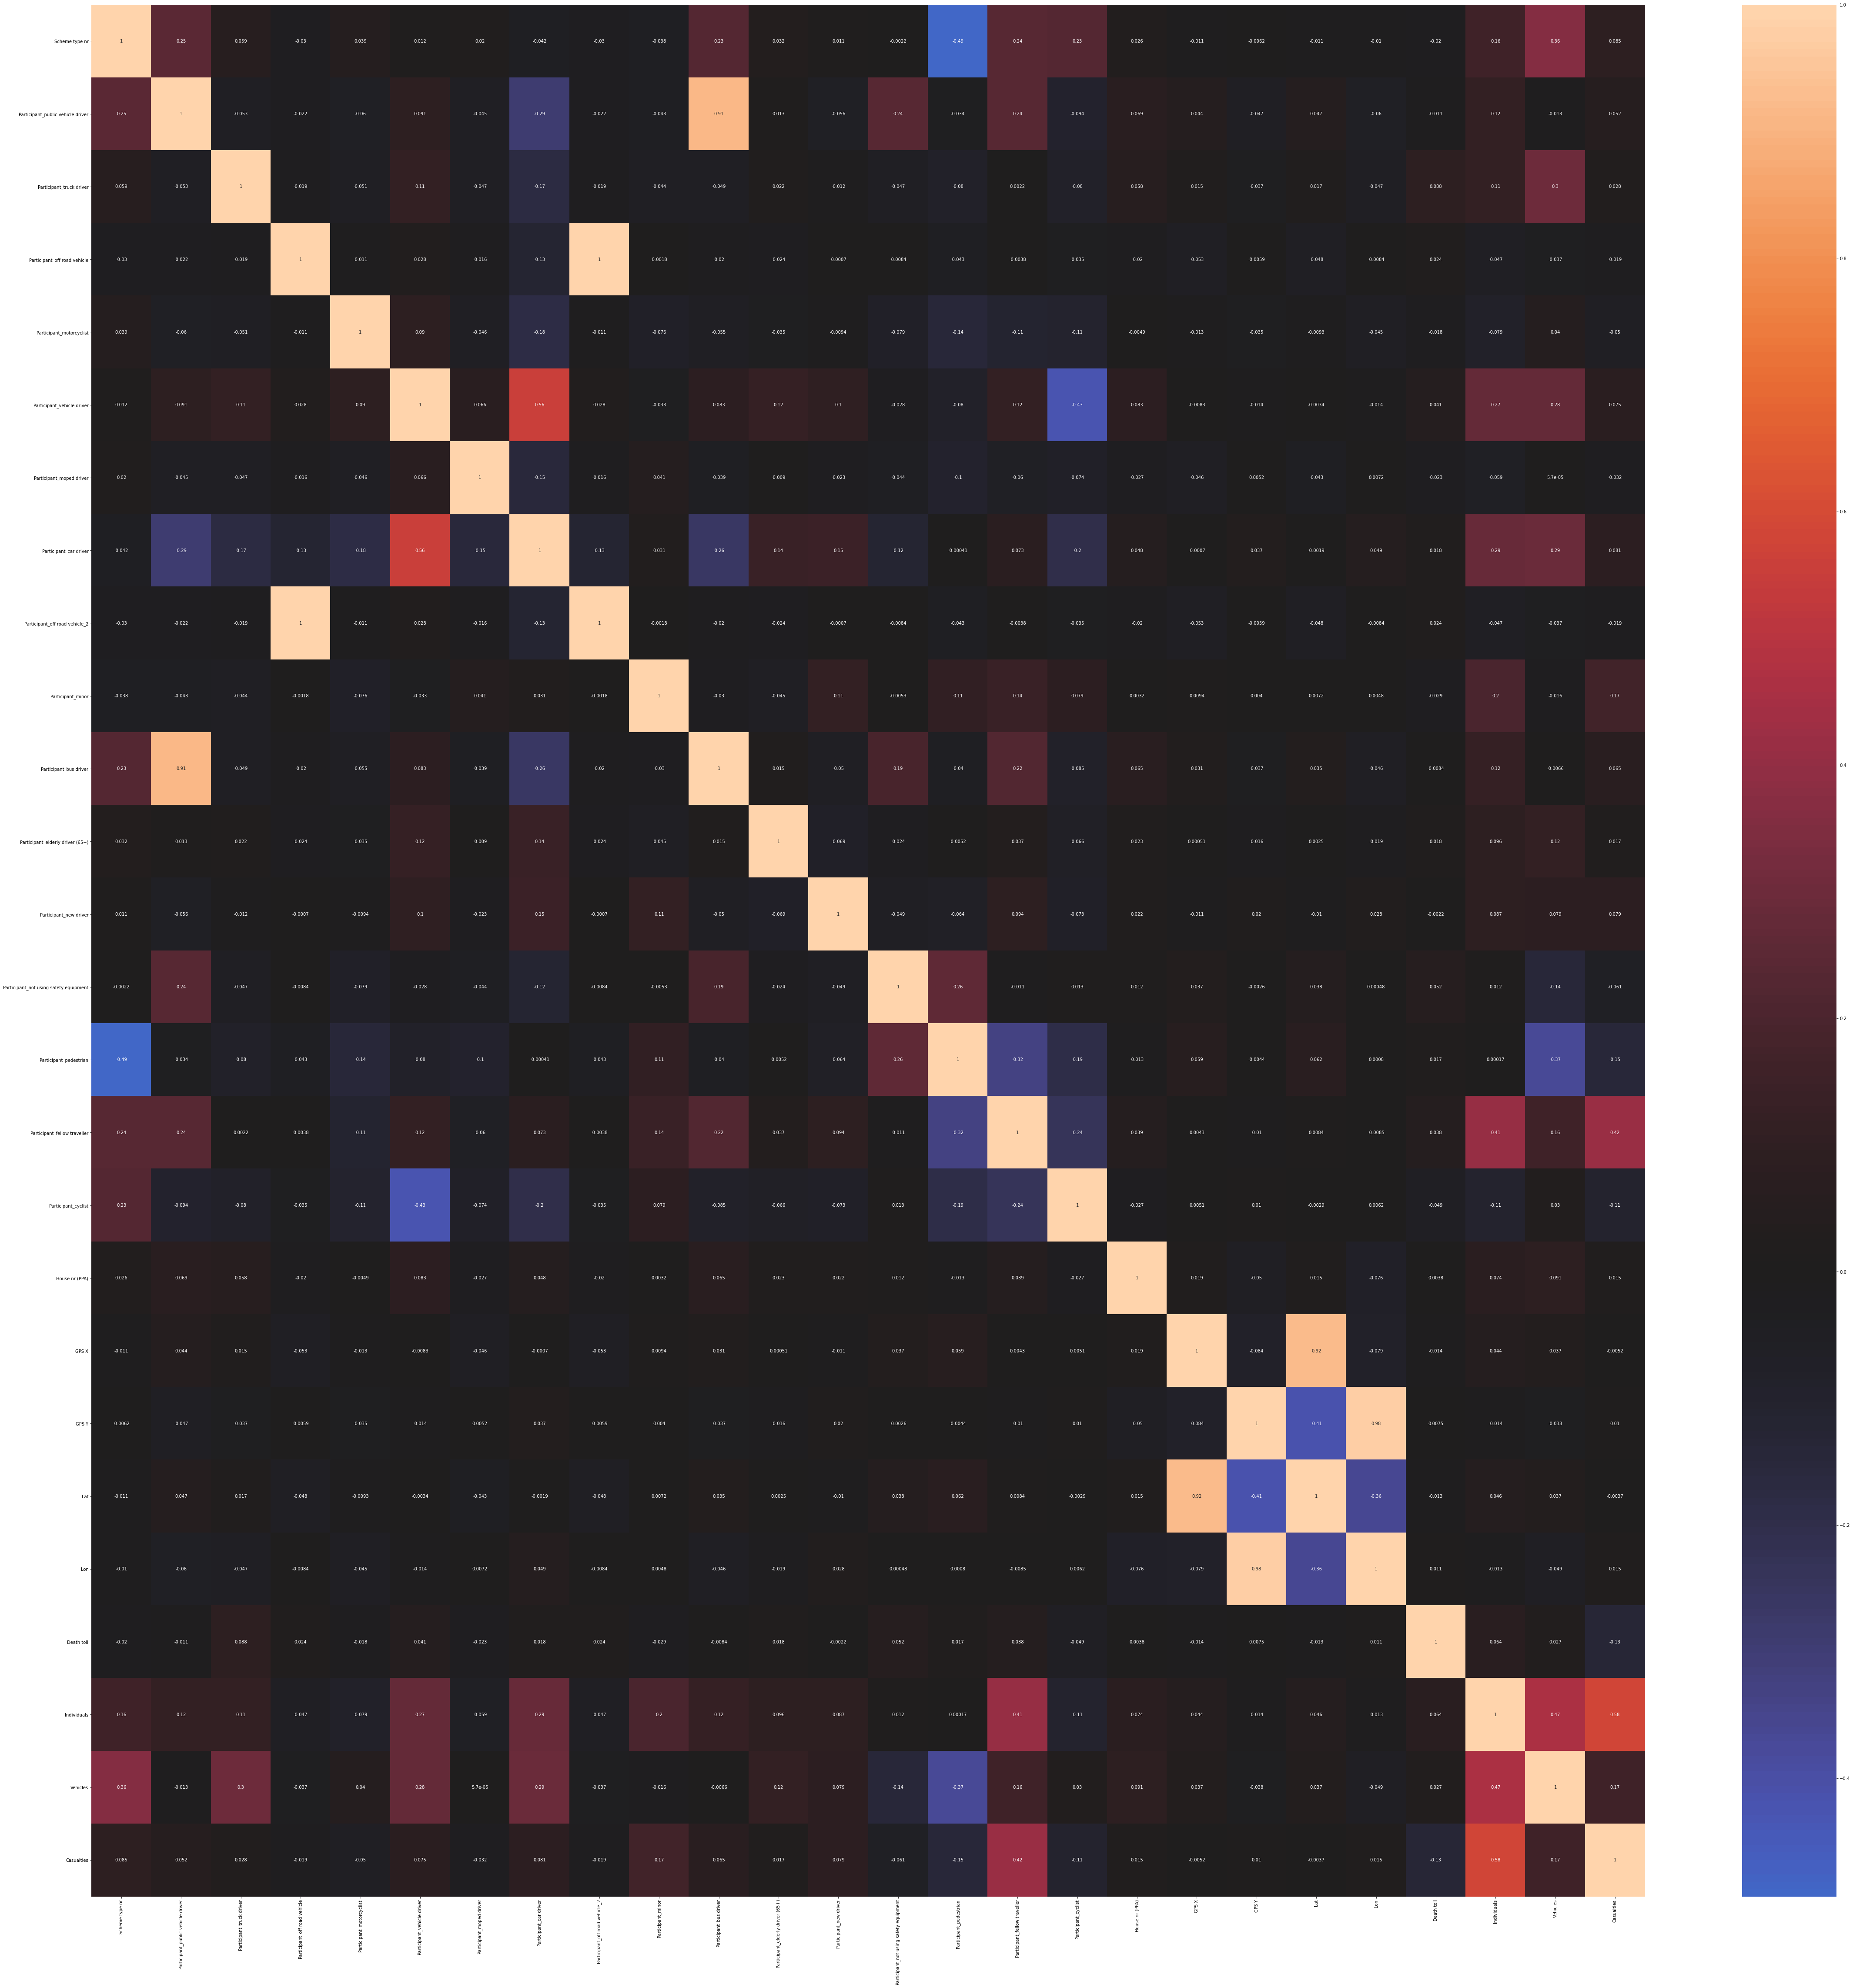

In [45]:
fig, ax = plt.subplots(figsize=(80,80))
sns.heatmap(df.corr(), center=0, annot=True)
#low corralation -> good

<AxesSubplot:>

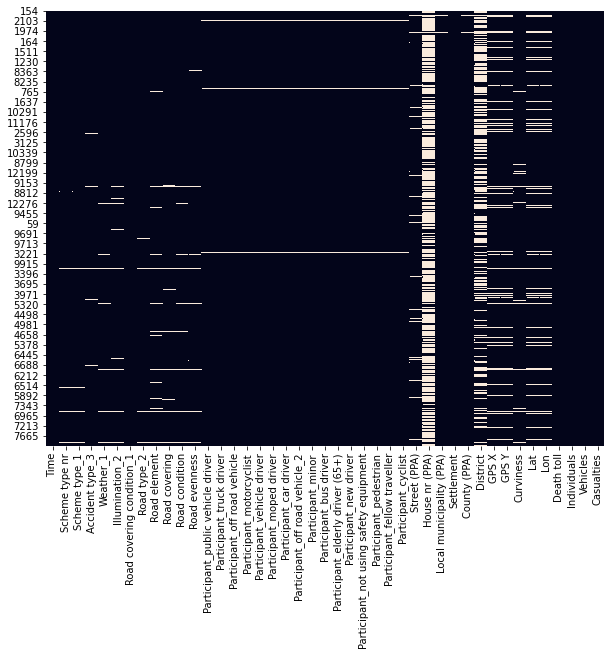

In [46]:
#visualizing nan-values
plt.figure(figsize = (10,8))
sns.heatmap(df.isnull(), cbar=False, xticklabels=1)
#maybe drop house nr and district?

In [39]:
#check and delte columns with one value
print(len(df.columns))
cols = df.columns.tolist()  
for col in cols:
    if len(set(df[col].tolist())) < 2:  
        df = df.drop(col, axis=1)  
print(len(df.columns))  


#check columns with 95% of the same value
num_rows = len(df.index)
low_information_cols = []

for col in df.columns:
    cnts = df[col].value_counts(dropna=False)
    top_pct = (cnts / num_rows).iloc[0]

    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct * 100))
        print(cnts)
        print()
        #drop one of the Participant_off road vehicle columns
        #we can think about dropping columns with more than x nan-values

43
43
Participant_off road vehicle: 98.59880%
0.0    12455
NaN       91
1.0       86
Name: Participant_off road vehicle, dtype: int64

Participant_moped driver: 95.59056%
0.0    12075
1.0      466
NaN       91
Name: Participant_moped driver, dtype: int64

Participant_off road vehicle_2: 98.59880%
0.0    12455
NaN       91
1.0       86
Name: Participant_off road vehicle_2, dtype: int64

Death toll: 95.49557%
0    12063
1      536
2       24
3        7
4        2
Name: Death toll, dtype: int64



,Time,Scheme type nr,Participant_public vehicle driver,Participant_truck driver,Participant_off road vehicle,Participant_motorcyclist,Participant_vehicle driver,Participant_moped driver,Participant_car driver,Participant_off road vehicle_2,...,District_Ärina küla,District_Ääsmäe küla,District_Õssu küla,District_Õuna küla,District_Üksnurme küla,District_Ülejõe küla,District_Ülenurme alevik,Curviness_Gentle curve,Curviness_Sharp curve,Curviness_Straight road
154,2012-01-01 01:00:00,104.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1789,2012-01-01 01:55:00,203.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,1,0,0
155,2012-01-01 05:30:00,298.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,1
195,2012-01-02 08:10:00,104.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1816,2012-01-02 10:30:00,106.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8151,2020-12-30 14:58:00,403.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,1
8152,2020-12-30 18:49:00,202.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,1,0,0
8153,2020-12-31 08:25:00,602.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,1
8154,2020-12-31 15:32:00,103.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
